# Regresión Logística

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
X = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, 4].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.25, random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Ajustar modelo de Regresion Logistica para el conjunto de entrenamiento

In [14]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Haciendo predicciones

In [20]:
y_pred = classifier.predict(X_test)

comparador = pd.DataFrame({'y' :y_test, 'y_pred': y_pred})
comparador

,y,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,1,0
96,0,0
97,1,0
98,1,1


Comparando elemento a elemento no es una buena técnica para verificar que tan bueno es el modelo. Para esto creamos una matriz de confusión

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

La diagonal principal indica los aciertos y la diagonal secundaria indica los errores

### Representación gráfica de los resultados del algoritmo en el conjunto de entrenamiento

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


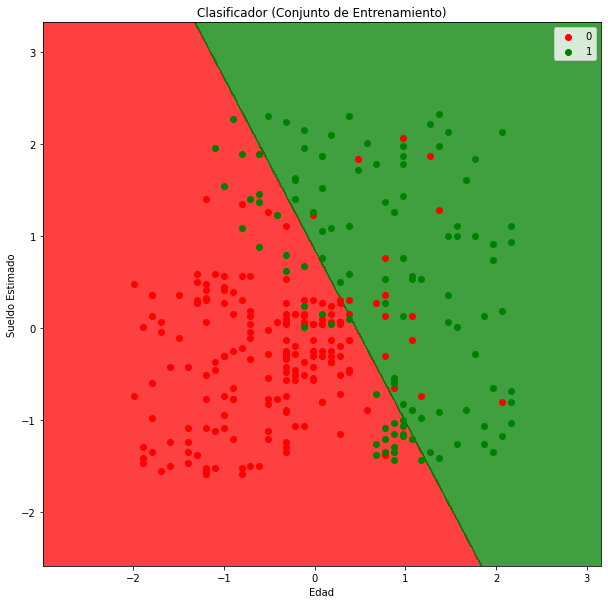

In [38]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X_1, X_2 = np. meshgrid(np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max() + 1, step = 0.01),
                       np.arange(start = X_set[:, 1].min()-1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize = (10,10))
plt.contourf(X_1, X_2, classifier.predict(np.array([X_1.ravel(), X_2.ravel()]).T).reshape(X_1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X_1.min(), X_1.max())
plt.ylim(X_2.min(), X_2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

### Representación gráfica de los resultados del algoritmo en el conjunto de testing

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


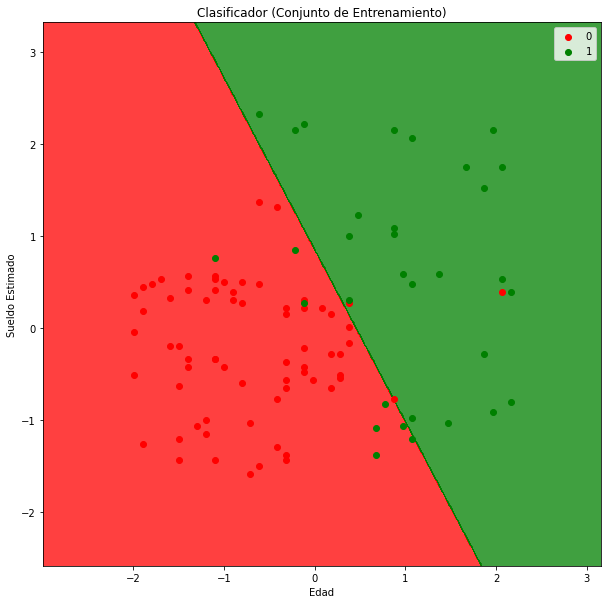

In [45]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X_1, X_2 = np. meshgrid(np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max() + 1, step = 0.01),
                       np.arange(start = X_set[:, 1].min()-1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize = (10,10))
plt.contourf(X_1, X_2, classifier.predict(np.array([X_1.ravel(), X_2.ravel()]).T).reshape(X_1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X_1.min(), X_1.max())
plt.ylim(X_2.min(), X_2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()